In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.pyplot import stairs, bar
from scipy.stats import ttest_ind

In [3]:
df = pd.read_csv('calculated.csv')
df.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,lastfm_url,track,artist,seeds,number_of_emotion_tags,valence_tags,arousal_tags,dominance_tags,mbid,spotify_id,genre,lyrics,binary_valence,calculatedValence,calculatedDominance,calculatedArousal
0,0,0,2949,https://www.last.fm/music/skywave/_/another%2b...,Another Love,Skywave,"['explosive', 'euphoric']",5,5.440000,4.582000,4.548000,3eba75ff-50d1-48eb-b39f-2e1e456c0847,NaN,shoegaze,"[Intro]\nIt's Rittz, bitch\n\n[Verse 1]\nI can...",1,5.828876,5.634538,4.164418
1,1,1,65958,https://www.last.fm/music/neneh%2bcherry/_/pea...,Peace In Mind,Neneh Cherry,['reflective'],4,4.841667,2.815000,4.950000,05011436-be05-433d-b7d1-405f14b45838,3qij053VLKWDprTlF6REDl,trip-hop,I've got a little piece of mind\nFrom the comf...,0,6.093000,5.622000,4.091375
2,2,2,43234,https://www.last.fm/music/adam%2bgreen/_/goblin,Goblin,Adam Green,['silly'],1,6.720000,4.860000,6.500000,93f50361-0581-4dd6-a294-93ca5bef904f,122tMrH7PcUWMN4AcklyU0,folk,When she stopped talking to me\nI knew that sh...,1,5.738000,5.548000,4.086800
3,3,3,5766,https://www.last.fm/music/ceremony/_/i%2bwant%...,I Want To Put This To An End,Ceremony,['intense'],2,3.995000,6.135000,4.585000,3b09dada-b877-4bda-b35a-34a1d28b1461,3HBwKXoQnPdi8Tzmioiwyv,hardcore,"My heart beats in slow songs, pumping moments ...",0,5.382264,5.339811,4.143774
4,4,4,61410,https://www.last.fm/music/beyond%2bcreation/_/...,Coexistence,Beyond Creation,['technical'],2,5.693333,5.476275,6.390392,e4348ebc-97f2-4bcb-af2e-2998d0fae905,3TfnNa2rOCuGZi4IBWtYVE,technical death metal,When the universal darkness is covering the ea...,1,5.810159,5.637222,4.049206


In [4]:
errorsV = [(song['calculatedValence'] - song['valence_tags']) ** 2 for _, song in df.iterrows()]
errorsD = [(song['calculatedDominance'] - song['dominance_tags']) ** 2 for _, song in df.iterrows()]
errorsA = [(song['calculatedArousal'] - song['arousal_tags']) ** 2 for _, song in df.iterrows()]


In [5]:
RMSEs = {'valence': np.mean(errorsV) ** 0.5, 'dominance': np.mean(errorsD) ** 0.5, 'arousal':np.mean(errorsA) ** 0.5}

In [6]:
print(RMSEs)

{'valence': 1.5559954711688595, 'dominance': 1.1720475613734351, 'arousal': 1.177999177277437}


In [7]:
genres = set(df['genre'].tolist())
genres = [genre for genre in genres if genre == genre]
print(genres)

['psychobilly', 'southern rock', 'breaks', 'cello', 'pop', 'world', 'space rock', 'mpb', 'k-pop', 'martial industrial', 'doom metal', 'folk punk', 'deathcore', 'world fusion', 'slowcore', 'bluegrass', 'dubstep', 'ebm', 'garage', 'death metal', 'electropop', 'comic', 'nu metal', 'hard trance', 'pop punk', 'flamenco', 'british', 'rockabilly', 'sludge metal', 'power pop', 'cosmic american', 'metalcore', 'ukulele', 'industrial rock', 'quiet storm', 'jazz', 'neoclassical darkwave', 'shoegaze', 'brazilian rock', 'rave', 'electronic', 'folk rock', 'hip-hop', 'aggrotech', 'eurovision', 'j-rock', 'acid jazz', 'soul', 'sad', 'disney', 'country rock', 'oshare kei', 'electroclash', 'crunk', 'indietronica', 'uk garage', 'piano rock', 'djent', 'boy band', 'speedcore', 'free improvisation', 'cabaret', 'lo-fi', 'happy', 'country', 'qawwali', 'violin', 'german rock', 'canadian rock', 'worship', 'cyberpunk', 'post-punk', 'noise rock', 'bossa nova', 'noise pop', 'underground hip hop', 'halloween', 'tranc

In [8]:
rockGenres = []
for genre in genres:
    if 'rock' in genre or 'metal' in genre:
        rockGenres.append(genre)
print(rockGenres)

popGenres = []
for genre in genres:
    if 'pop' in genre:
        popGenres.append(genre)
print(popGenres)

rapGenres = []
for genre in genres:
    if 'rap' in genre or 'hip hop' in genre or 'trap' in genre:
        rapGenres.append(genre)
print(rapGenres)

['southern rock', 'space rock', 'doom metal', 'death metal', 'nu metal', 'rockabilly', 'sludge metal', 'metalcore', 'industrial rock', 'brazilian rock', 'folk rock', 'j-rock', 'country rock', 'piano rock', 'german rock', 'canadian rock', 'noise rock', 'metal', 'gothic metal', 'melodic death metal', 'christian rock', 'progressive rock', 'gothic rock', 'garage rock', 'black metal', 'post-metal', 'alternative rock', 'soft rock', 'technical death metal', 'alternative metal', 'symphonic metal', 'math rock', 'power metal', 'pop rock', 'hard rock', 'thrash metal', 'depressive black metal', 'classic rock', 'roots rock', 'avant-garde metal', 'rock', 'industrial metal', 'melodic hard rock', 'deathrock', 'ostrock', 'symphonic death metal', 'progressive metal', 'stoner rock', 'post-rock', 'folk metal', 'rock en espanol', 'blues rock', 'indie rock', 'glam metal', 'melodic metal', 'glam rock', 'psychedelic rock', 'art rock']
['pop', 'k-pop', 'electropop', 'pop punk', 'power pop', 'noise pop', 'dream

In [9]:
avgVRock = np.mean([song['calculatedValence'] for _, song in df.iterrows() if song['genre'] in rockGenres])
print(avgVRock)
avgVNotRock = np.mean([song['calculatedValence'] for _, song in df.iterrows() if song['genre'] not in rockGenres])
print(avgVNotRock)
print()
avgVPop = np.mean([song['calculatedValence'] for _, song in df.iterrows() if song['genre'] in popGenres])
print(avgVPop)
avgVNotPop = np.mean([song['calculatedValence'] for _, song in df.iterrows() if song['genre'] not in popGenres])
print(avgVNotPop)
print()
avgVRap = np.mean([song['calculatedValence'] for _, song in df.iterrows() if song['genre'] in rapGenres])
print(avgVRap)
avgVNotRap = np.mean([song['calculatedValence'] for _, song in df.iterrows() if song['genre'] not in rapGenres])
print(avgVNotRap)

5.70487321069198
5.775079164597889

5.849121497019135
5.747392700242456

5.6655181325571
5.760856868785295


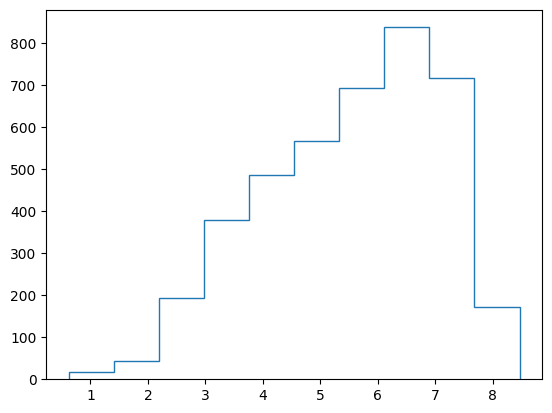

In [10]:
counts, bins = np.histogram(df['valence_tags'])
stairs(counts, bins)

Text(0, 0.5, 'Count')

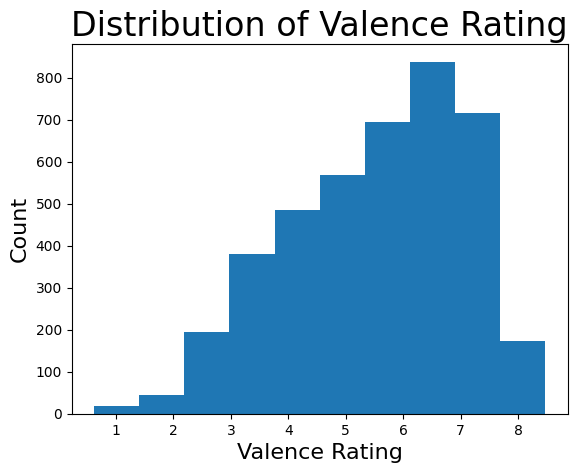

In [19]:
plt.hist(df['valence_tags'])
plt.title('Distribution of Valence Rating', fontsize = 24)
plt.xlabel('Valence Rating', fontsize = 16)
plt.ylabel('Count', fontsize = 16)


In [12]:
rock = [song['calculatedValence'] for _, song in df.iterrows() if song['genre'] in rockGenres]
notRock = [song['calculatedValence'] for _, song in df.iterrows() if song['genre'] not in rockGenres]
pop = [song['calculatedValence'] for _, song in df.iterrows() if song['genre'] in popGenres]
notPop = [song['calculatedValence'] for _, song in df.iterrows() if song['genre'] not in rockGenres]
rap = [song['calculatedValence'] for _, song in df.iterrows() if song['genre'] in rapGenres]
notRap = [song['calculatedValence'] for _, song in df.iterrows() if song['genre'] not in rapGenres]


t, p = ttest_ind(rock,
                notRock,
                equal_var = False)
print(t, p)
t2, p2 = ttest_ind(pop,
               notPop,
                equal_var = False)
print(t2, p2)
t3, p3 = ttest_ind(rap,
               notRap,
                equal_var = False)
print(t3, p3)

-4.597490521573612 4.637951245014562e-06
3.7391400946904993 0.0002010900945231298
-2.1390703019239248 0.03627276137029488


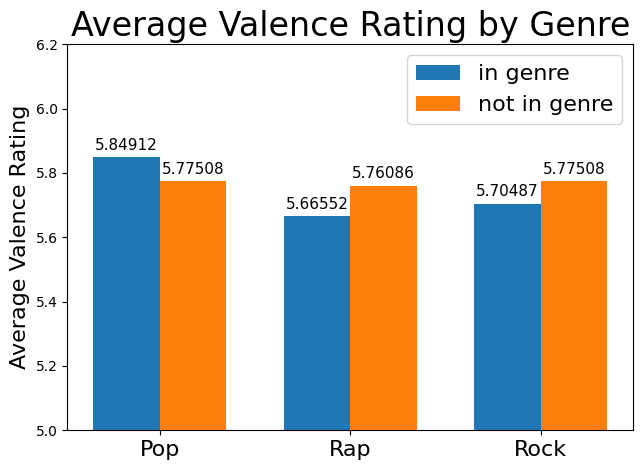

In [29]:
labels = ['Pop', 'Rap', 'Rock']
in_means = [np.mean(pop), np.mean(rap), np.mean(rock)]
not_means = [np.mean(notPop), np.mean(notRap), np.mean(notRock)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, in_means, width, label='in genre')
rects2 = ax.bar(x + width/2, not_means, width, label='not in genre')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Valence Rating', fontsize = 16)
ax.set_title('Average Valence Rating by Genre', fontsize = 24)
ax.set_xticks(x, labels, fontsize = 16)
ax.legend(fontsize = 16)

ax.bar_label(rects1, padding=3, fontsize = 11)
ax.bar_label(rects2, padding=3, fontsize = 11)

fig.tight_layout()

plt.ylim(5, 6.2)


plt.show()

(array([1.000e+00, 3.000e+00, 9.000e+00, 2.100e+01, 3.300e+01, 1.500e+02,
        1.641e+03, 2.119e+03, 1.260e+02, 8.000e+00]),
 array([1.67      , 2.25507143, 2.84014286, 3.42521429, 4.01028571,
        4.59535714, 5.18042857, 5.7655    , 6.35057143, 6.93564286,
        7.52071429]),
 <BarContainer object of 10 artists>)

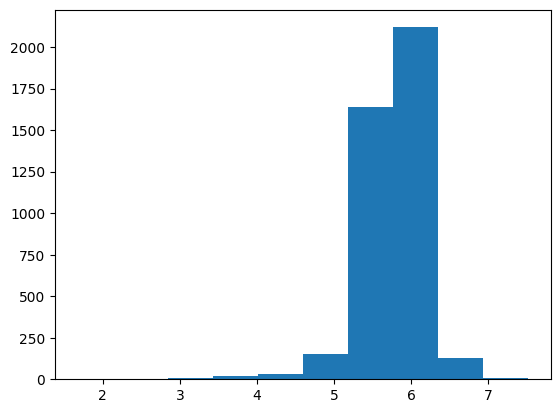

In [14]:
plt.hist(df['calculatedValence'])

(array([1.000e+00, 8.000e+00, 8.000e+00, 3.300e+01, 9.700e+01, 1.083e+03,
        2.622e+03, 2.330e+02, 2.100e+01, 5.000e+00]),
 array([3.28 , 3.647, 4.014, 4.381, 4.748, 5.115, 5.482, 5.849, 6.216,
        6.583, 6.95 ]),
 <BarContainer object of 10 artists>)

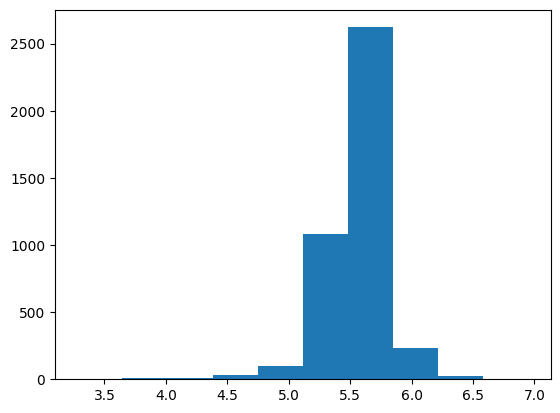

In [15]:
plt.hist(df['calculatedDominance'])

(array([1.200e+01, 2.620e+02, 2.676e+03, 1.047e+03, 7.700e+01, 2.100e+01,
        8.000e+00, 6.000e+00, 1.000e+00, 1.000e+00]),
 array([2.93666667, 3.333     , 3.72933333, 4.12566667, 4.522     ,
        4.91833333, 5.31466667, 5.711     , 6.10733333, 6.50366667,
        6.9       ]),
 <BarContainer object of 10 artists>)

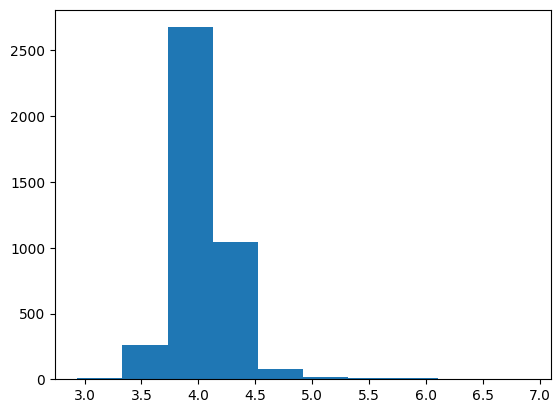

In [16]:
plt.hist(df['calculatedArousal'])

In [36]:
df['calcPred'] = df.calculatedValence > 5

def getNum(row):
    return int(row['calcPred'])

df['calcPredBin'] = df.apply(lambda row: getNum(row), axis = 1)

In [38]:
df.head(20)

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,lastfm_url,track,artist,seeds,number_of_emotion_tags,valence_tags,arousal_tags,...,mbid,spotify_id,genre,lyrics,binary_valence,calculatedValence,calculatedDominance,calculatedArousal,calcPred,calcPredBin
0,0,0,2949,https://www.last.fm/music/skywave/_/another%2b...,Another Love,Skywave,"['explosive', 'euphoric']",5,5.440000,4.582000,...,3eba75ff-50d1-48eb-b39f-2e1e456c0847,NaN,shoegaze,"[Intro]\nIt's Rittz, bitch\n\n[Verse 1]\nI can...",1,5.828876,5.634538,4.164418,True,1
1,1,1,65958,https://www.last.fm/music/neneh%2bcherry/_/pea...,Peace In Mind,Neneh Cherry,['reflective'],4,4.841667,2.815000,...,05011436-be05-433d-b7d1-405f14b45838,3qij053VLKWDprTlF6REDl,trip-hop,I've got a little piece of mind\nFrom the comf...,0,6.093000,5.622000,4.091375,True,1
2,2,2,43234,https://www.last.fm/music/adam%2bgreen/_/goblin,Goblin,Adam Green,['silly'],1,6.720000,4.860000,...,93f50361-0581-4dd6-a294-93ca5bef904f,122tMrH7PcUWMN4AcklyU0,folk,When she stopped talking to me\nI knew that sh...,1,5.738000,5.548000,4.086800,True,1
3,3,3,5766,https://www.last.fm/music/ceremony/_/i%2bwant%...,I Want To Put This To An End,Ceremony,['intense'],2,3.995000,6.135000,...,3b09dada-b877-4bda-b35a-34a1d28b1461,3HBwKXoQnPdi8Tzmioiwyv,hardcore,"My heart beats in slow songs, pumping moments ...",0,5.382264,5.339811,4.143774,True,1
4,4,4,61410,https://www.last.fm/music/beyond%2bcreation/_/...,Coexistence,Beyond Creation,['technical'],2,5.693333,5.476275,...,e4348ebc-97f2-4bcb-af2e-2998d0fae905,3TfnNa2rOCuGZi4IBWtYVE,technical death metal,When the universal darkness is covering the ea...,1,5.810159,5.637222,4.049206,True,1
5,7,7,39497,https://www.last.fm/music/the%2bpresidents%2bo...,We Are Not Going to Make It,The Presidents of the United States of America,['fun'],5,7.628333,5.490238,...,a1115750-e426-416d-aa9b-9954eb0e0b0a,3NGrc0nxQtSPej5QMmJItI,rock,"We're not gonna make it\nNo, no, we're not gon...",1,6.294528,5.893962,4.010189,True,1
6,8,8,38966,https://www.last.fm/music/hot%2bhot%2bheat/_/g...,Goodnight Goodnight,Hot Hot Heat,['fun'],11,7.906176,5.689118,...,34fb12a1-8b0b-4d0d-832f-05df36671d24,40BgOdfYhsRf6yVepRFCzu,indie,[Verse 1]\nIt's not enough to hear me say you'...,1,5.843929,5.551071,4.076905,True,1
7,9,9,24028,https://www.last.fm/music/phil%2blesh%2band%2b...,Pride of Cucamonga,Phil Lesh and Friends,['lazy'],1,3.050000,3.050000,...,NaN,4JgVGoUZ4Gn3SETJjET8Qu,NaN,"Out on the edge of an empty highway, howling a...",0,5.608333,5.427708,4.007917,True,1
8,12,12,6867,https://www.last.fm/music/ween/_/i%2527m%2bdan...,I'm Dancing in the Show Tonight,Ween,"['ominous', 'quirky']",3,7.082857,5.769524,...,38415acc-13a4-4714-aad2-43495ef817b0,NaN,experimental,[Verse 1]\nAre my ribbons tied? Is my hair in ...,1,5.976277,5.773936,3.873617,True,1
9,16,16,82085,https://www.last.fm/music/john%2bfrusciante/_/...,Walls,John Frusciante,['hypnotic'],1,5.250000,3.730000,...,NaN,72D2PY7xoa2LJy9iGzDOgV,electronica,Rain on your mind\nIf I'm so inclined\nIt's le...,1,6.022529,5.520345,4.011034,True,1


In [39]:
confusion_matrix = pd.crosstab(df['binary_valence'], df['calcPredBin'], rownames=['Actual'], colnames=['Predicted'])

In [40]:
print(confusion_matrix)

Predicted   0     1
Actual             
0          48  1365
1          87  2611


In [43]:
accuracy = (confusion_matrix[0][0] + confusion_matrix[1][1]) / len(df)
print(accuracy)

0.6468012648990513


In [47]:
recall = confusion_matrix[1][1] / (confusion_matrix[0][1] + confusion_matrix[1][1])
print(recall)
precision = confusion_matrix[1][1] / (confusion_matrix[1][0] + confusion_matrix[1][1])
print(precision)
f1 = (2 * precision * recall) / (precision + recall)
print(f1)

0.9677538917716827
0.6566901408450704
0.7824393167515733
